In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

<br>
The Lenet-5 model originally receives 32x32 images. Hence, we pad the 28x28 MNIST images with zeros. <br>
Also the images are scaled between 0 and 1.

In [4]:
X_train = tf.pad(X_train, [[0, 0], [2, 2], [2, 2]]) / 255
X_test = tf.pad(X_test, [[0, 0], [2, 2], [2, 2]]) / 255
X_train.shape

TensorShape([60000, 32, 32])

<br>
Most CNN's accept 4-dimensional tensors as inputs, having dimensions of batch size, height, width, and channel. Hence we add a dummy dimension here.

In [5]:
X_train = tf.expand_dims(X_train, axis=3)
X_test = tf.expand_dims(X_test, axis=3)
X_train.shape

TensorShape([60000, 32, 32, 1])

<br>
The last 2000 samples of training set are reserverd for validation set. <br>
The validation set is used for tuning the hyperparameters of the model.

In [6]:
X_val = X_train[-2000:, :, :, :]
y_val = y_train[-2000:]
X_train = X_train[:-2000, :, :, :]
y_train = y_train[:-2000]

X_train.shape

TensorShape([58000, 32, 32, 1])

#### Model

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=X_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
activation (Activation)      (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 120)         4

#### Compilation

In [8]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

#### Fitting

In [9]:
hist = model.fit(X_train, y_train, batch_size=64, epochs=40, validation_data=(X_val, y_val))

Epoch 1/40
907/907 [==============================] - 21s 22ms/step - loss: 1.6906 - accuracy: 0.3736 - val_loss: 0.3634 - val_accuracy: 0.8960
Epoch 2/40
907/907 [==============================] - 18s 20ms/step - loss: 0.3645 - accuracy: 0.8846 - val_loss: 0.1930 - val_accuracy: 0.9530
Epoch 3/40
907/907 [==============================] - 24s 27ms/step - loss: 0.2671 - accuracy: 0.9148 - val_loss: 0.1890 - val_accuracy: 0.9485
Epoch 4/40
907/907 [==============================] - 22s 25ms/step - loss: 0.2206 - accuracy: 0.9314 - val_loss: 0.1642 - val_accuracy: 0.9540
Epoch 5/40
907/907 [==============================] - 22s 25ms/step - loss: 0.1961 - accuracy: 0.9380 - val_loss: 0.1488 - val_accuracy: 0.9575
Epoch 6/40
907/907 [==============================] - 23s 25ms/step - loss: 0.1761 - accuracy: 0.9447 - val_loss: 0.1196 - val_accuracy: 0.9675
Epoch 7/40
907/907 [==============================] - 26s 29ms/step - loss: 0.1616 - accuracy: 0.9489 - val_loss: 0.0842 - val_accuracy:

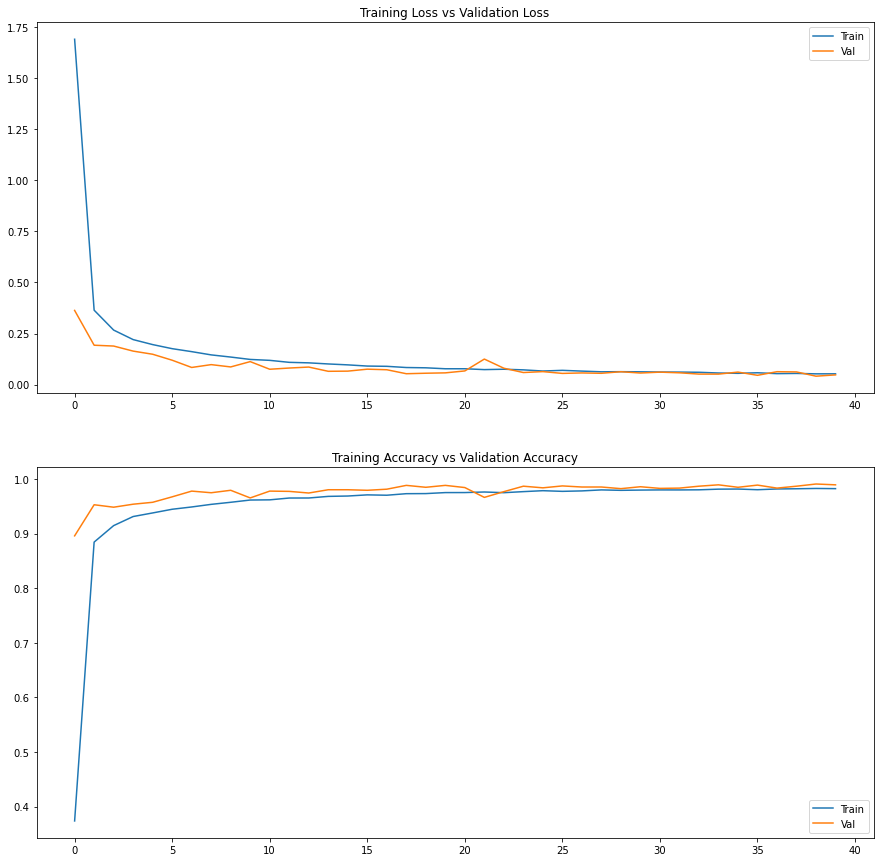

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))

axs[0].plot(hist.history['loss'])
axs[0].plot(hist.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])

axs[1].plot(hist.history['accuracy'])
axs[1].plot(hist.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])

plt.show()

In [14]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0520 - accuracy: 0.9836


[0.052000392228364944, 0.9836000204086304]